<a href="https://colab.research.google.com/github/ali-workshop/brain-tumar/blob/main/brain_tumar_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IMPORT LIRARIES
The code defines a deep convolutional neural network (CNN) using Keras layers, which are then trained on a dataset of images using an optimizer like Adam or Adamax. The code also uses techniques like data augmentation to prevent overfitting, and dropout layers to reduce the chances of overfitting. Finally, the code outputs a classification report and confusion matrix to evaluate the performance of the model.

In [ ]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
import random
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")


### define data path

In [ ]:
data_path = '/content/drive/MyDrive/brain_tumar_edit'

### define the classes of this dataset (44 class)
NOTE:
os.listdir return "list"

In [ ]:
classes = os.listdir(data_path)

print list of classes

In [ ]:
print(classes)

['Carcinoma T2', 'Ependimoma T2', 'Carcinoma T1C+', 'Ependimoma T1', 'Carcinoma T1', 'Ganglioglioma T1', 'Astrocitoma T1', 'Astrocitoma T2', 'Ependimoma T1C+', 'Astrocitoma T1C+', 'Glioblastoma T1C+', 'Germinoma T1', 'Glioblastoma T1', 'Granuloma T1C+', 'Granuloma T1', 'Germinoma T2', 'Ganglioglioma T1C+', 'Ganglioglioma T2', 'Germinoma T1C+', 'Glioblastoma T2', 'Neurocitoma T1', 'Meningioma T1C+', 'Neurocitoma T2', 'Meduloblastoma T2', 'Meduloblastoma T1', 'Meduloblastoma T1C+', 'Meningioma T2', 'Meningioma T1', 'Granuloma T2', 'Neurocitoma T1C+', 'Oligodendroglioma T1', 'Oligodendroglioma T2', 'Papiloma T1', 'Papiloma T2', 'Schwannoma T1C+', 'Papiloma T1C+', 'Schwannoma T2', 'Oligodendroglioma T1C+', 'Schwannoma T1', 'Tuberculoma T1', '_NORMAL T2', '_NORMAL T1', 'Tuberculoma T1C+', 'Tuberculoma T2']


### define function for plot a random classes

In [ ]:
def plot_class(path):
    plt.figure(figsize=(12,12))
    title = path.split('/')[-1]
    for i in range(1,5):
        plt.subplot(1,4,i)
        plt.tight_layout()
        rand_img = plt.imread(path +'//'+ random.choice(sorted(os.listdir(path))))
        plt.imshow(rand_img)
        plt.title(title, fontsize=15, color='blue')
        plt.xticks([])
        plt.yticks([])

### call this function belwo

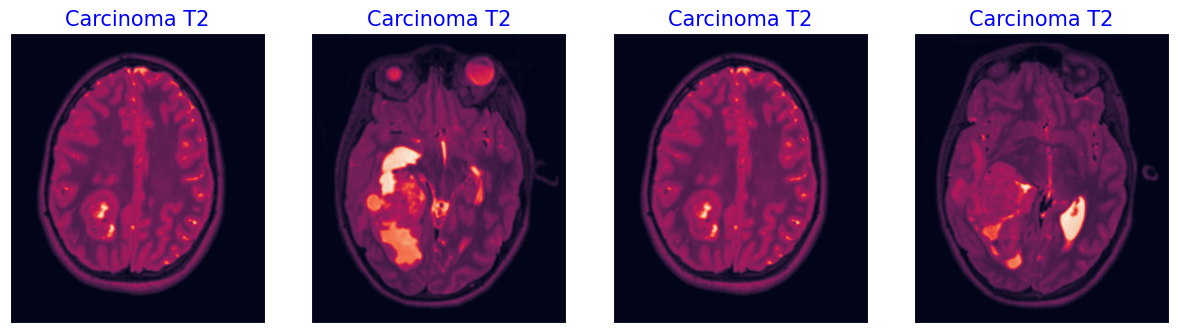

In [ ]:
plot_class(data_path+"/"+classes[0])

### this function belwo for load data in datafram and visulization purposes

In [ ]:
def main(train_data_path):

    """
    return training and testing dataframes including 2 columns image path and its label

    Args:
      train_data_path (string): string includes your train data path
      test_data_path (string): string includes your test data path
      note: data_path argument must contains your classes dirs

    Returns:
      train_df (dataframe):  It consists of two columns (the path of the image and its label) and contains records of the path of the training images and the label of each image
      test_df (dataframe):  It consists of two columns (the path of the image and its label) and contains records of the path of the testing images and the label of each image

    """

    for dirs in [train_data_path]:

        filepaths = []
        labels = []
        classes_list = sorted(os.listdir(dirs))

        filepaths,labels = get_fileList(classes_list, dirs, filepaths, labels)

        train_df = obtain_train_df(filepaths, labels)


    return train_df


def get_fileList(classes_list, dirs, filepaths, labels):


    """
    return file paths list including all full image paths and label for each one

    Args:
      classes_list (list): list includes name of classes dirs
      dirs (string): the data path
      filepaths (list): empty list to fill with images paths later
      labels (list): empty list to fill with each image label later

    Returns:
      count (scalar):  number of images in your dataset
    """


    for s_class in classes_list:

        label = s_class
        classpath = os.path.join(dirs, s_class)
        flist = sorted(os.listdir(classpath))

        store_image_names_and_its_labels(flist, classpath, filepaths, labels, label)

    return filepaths, labels


def store_image_names_and_its_labels(flist, classpath, filepaths, labels, label):

    """
    return nothing, it fills the filepaths list with all the images paths and its labels

    Args:
      flist (list) : contains all the image names in certain class
      classes_list (list): list includes name of classes dirs
      filepaths (list): stores all the images paths
      labels (list): stores the label of each image in the dataset
      label (string): label for a specific image

    Returns:
      nothing
    """


    for file in flist:
        file_path = os.path.join(classpath, file)
        filepaths.append(file_path)
        labels.append(label)



def obtain_train_df(filepaths, labels):

    """
    Return Dataframe with 2 columns contains each image path with its label

    Args:
      filepaths (list): stores all the images paths
      labels (list): stores the label of each image in the dataset

    Returns:
      train_df (DataFrame):  Dataframe with 2 columns contains each image path with its label
    """

    train_df =pd.DataFrame({
        'image_path' : filepaths,
        'label' : labels
    })
    return train_df


In [ ]:
data_df = main(data_path)

In [ ]:
data_df.head(10)

,image_path,label
0,/content/drive/MyDrive/brain_tumar_edit/Astroc...,Astrocitoma T1
1,/content/drive/MyDrive/brain_tumar_edit/Astroc...,Astrocitoma T1
2,/content/drive/MyDrive/brain_tumar_edit/Astroc...,Astrocitoma T1
3,/content/drive/MyDrive/brain_tumar_edit/Astroc...,Astrocitoma T1
4,/content/drive/MyDrive/brain_tumar_edit/Astroc...,Astrocitoma T1


### the function below is helper function to plot the distribution of labels

In [ ]:
def count_plot(x, title, xlabel, ylabel, width, length, order = None, rotation=False, palette='winter'):
    plt.figure(figsize=(width,length))
    sns.countplot(x = x, palette=palette, order = order)
    plt.title(title, fontsize=25)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.show()

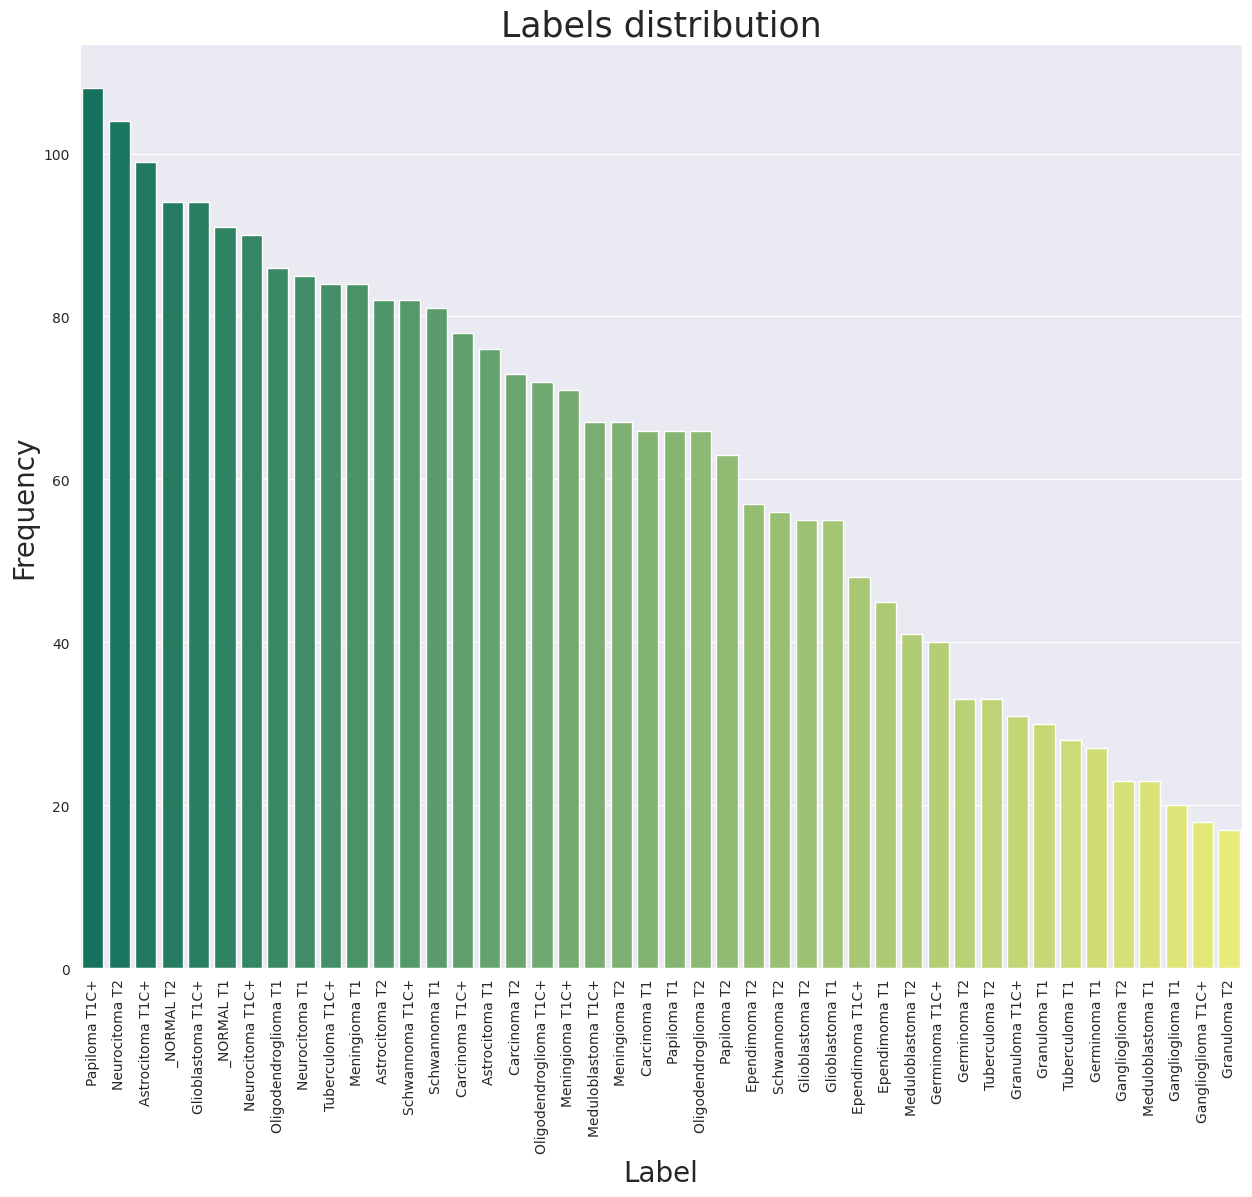

In [ ]:
x = data_df['label']
order = x.value_counts().index
count_plot(x, "Labels distribution", "Label", 'Frequency', 15,12, rotation = True, order=order, palette='summer')

### define helper function for claculate the F1-score
desc:

This script defines a Python function that calculates the F1 score, which is a measure of the accuracy of a binary classification model. The F1 score is the harmonic mean of precision and recall, and ranges from 0 to 1, with 1 being the best possible score. The function takes two input parameters, y_true and y_pred, which represent the true and predicted binary labels, respectively. The function first calculates the true positives, possible positives, and predicted positives using Keras backend functions. It then calculates the precision, recall, and F1 score using the formulae for these metrics. Finally, the function returns the F1 score value.

In [ ]:
def F1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

### Generate data paths with labels

Description:

This Python function is used to define file paths and labels for a dataset of images to be used in image classification. The function takes one input parameter, dir, which represents the directory containing the image data. The function first initializes two empty lists, filepaths, and labels. It then reads the contents of the directory and iterates over each folder, assuming each folder represents a different class. For each folder, the function retrieves the file names of all images in the folder and appends the file path to filepaths list and the folder name as a label to the labels list. Finally, the function returns the two lists, filepaths, and labels, which can be used to load the images and their corresponding labels into a machine learning or deep learning model for image classification.

In [ ]:

def define_paths(dir):
    filepaths = []
    labels = []

    folds = os.listdir(dir)
    for fold in folds:
        foldpath = os.path.join(dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)

    return filepaths, labels



###Concatenate data paths with labels into one dataframe ( to later be fitted into the model )

In [ ]:

def define_df(files, classes):
    Fseries = pd.Series(files, name= 'filepaths')
    Lseries = pd.Series(classes, name='labels')
    return pd.concat([Fseries, Lseries], axis= 1)


### Function that contain only a directory of data and it is not splitted

Description:

This Python code defines a function that loads an image classification dataset from two directories, splits it into train, validation, and test sets, and returns the resulting dataframes. The function takes two input parameters, tr_dir, and ts_dir, which represent the directories containing the training and testing image data, respectively.

The function first calls the define_paths() function to retrieve the file paths and labels of the images in the training directory. It then calls the define_df() function to create a pandas dataframe containing the file paths and labels, and splits the dataframe into a train and validation set using the train_test_split() function from scikit-learn. The function sets the train size to 0.8, which means that 80% of the data will be used for training and 20% for validation. The shuffle parameter is set to True to randomize the order of the data, and the stratify parameter is set to the label column to ensure that the train and validation sets have an equal proportion of each class.

The function then repeats the same process to create a pandas dataframe for the test set, using the define_paths() and define_df() functions with the test directory. Finally, the function returns the train, validation, and test dataframes, which can be used to train and evaluate an image classification model.

In [ ]:

def tr_ts_data(tr_dir, ts_dir):
    # train and valid dataframe
    files, classes = define_paths(tr_dir)
    df = define_df(files, classes)
    strat = df['labels']
    train_df, valid_df = train_test_split(df, train_size= 0.8, shuffle= True, random_state= 123, stratify= strat)

    # test dataframe
    files, classes = define_paths(tr_dir)
    test_df = define_df(files, classes)
    return train_df, valid_df, test_df


### Function that contain train and test directory of data.
Description:

This Python code defines a function that loads an image classification dataset from a single directory and splits it into train, validation, and test sets, returning the resulting dataframes. The function takes one input parameter, data_dir, which represents the directory containing the image data.

The function first calls the define_paths() function to retrieve the file paths and labels of the images in the directory. It then calls the define_df() function to create a pandas dataframe containing the file paths and labels.

The function then splits the dataframe into a train and dummy set using the train_test_split() function from scikit-learn. The train size is set to 0.8, which means that 80% of the data will be used for training and 20% for validation and testing. The shuffle parameter is set to True to randomize the order of the data, and the stratify parameter is set to the label column to ensure that the train set has an equal proportion of each class.

The function then splits the dummy set into a validation and test set using the same train_test_split() function with a train size of 0.5, which means that 50% of the remaining data will be used for validation and the other 50% for testing. The shuffle and stratify parameters are set to the same values as before.

Finally, the function returns the train, validation, and test dataframes, which can be used to train and evaluate an image classification model. This alternative approach is useful when the data is not already divided into separate train and test directories.



In [ ]:



def full_data(data_dir):
    # train dataframe
    files, classes = define_paths(data_dir)
    df = define_df(files, classes)
    strat = df['labels']
    train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123, stratify= strat)

    # valid and test dataframe
    strat = dummy_df['labels']
    valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 123, stratify= strat)

    return train_df, valid_df, test_df




### function that contain the three directory of data train, valid, and test

Description:

This Python code defines a function that loads an image classification dataset from three separate directories (train, validation, and test) and splits it into corresponding dataframes for each set. The function takes three input parameters, tr_dir, val_dir, and ts_dir, which represent the directories containing the train, validation, and test image data, respectively.

The function calls the define_paths() function for each directory to retrieve the file paths and labels of the images. It then calls the define_df() function for each directory to create pandas dataframes containing the file paths and labels.

The function then returns the resulting dataframes for each set, including the train, validation, and test sets. These dataframes can be used to train and evaluate an image classification model.

This approach is more traditional and assumes that the data is already separated into different directories for each set

In [ ]:

def tr_val_ts_data(tr_dir, val_dir, ts_dir):

    # train dataframe
    files, classes = define_paths(tr_dir)
    train_df = define_df(files, classes)

    # validation dataframe
    files, classes = define_paths(val_dir)
    valid_df = define_df(files, classes)

    # test dataframe
    files, classes = define_paths(ts_dir)
    test_df = define_df(files, classes)

    return train_df, valid_df, test_df

In [ ]:
def split_data(tr_dir, val_dir=None, ts_dir=None):
    '''
        This function split data into train, valid, and test after convert it to a dataframe.
        Dataset can be in several formats, it can contain train, valid, and test data, or it can contain only train and test data, etc.
        It depends on other needed function:
        - full_data function that contain only a directory of data and it is not splitted.
        - tr_ts_data function that contain train and test directory of data.
        - tr_val_ts_data function that contain the three directory of data train, valid, and test.
    '''

    # No Validation or Test data
    if val_dir == '' and ts_dir == '':
        train_df, valid_df, test_df = full_data(tr_dir)
        return train_df, valid_df, test_df

    # No Validation data
    elif val_dir == '' and ts_dir != '':
        train_df, valid_df, test_df = tr_ts_data(tr_dir, ts_dir)
        return train_df, valid_df, test_df

    # All data existed
    elif val_dir != '' and ts_dir != '':
        train_df, valid_df, test_df = tr_val_ts_data(tr_dir, val_dir, ts_dir)
        return train_df, valid_df, test_df

In [ ]:
def create_model_data (train_df, valid_df, test_df, batch_size):
    '''
    This function takes train, validation, and test dataframe and fit them into image data generator, because model takes data from image data generator.
    Image data generator converts images into tensors. '''


    # define model parameters
    img_size = (224, 224)
    channels = 3 # either BGR or Grayscale
    color = 'rgb'
    img_shape = (img_size[0], img_size[1], channels)

    # Recommended : use custom function for test data batch size, else we can use normal batch size.
    ts_length = len(test_df)
    test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
    test_steps = ts_length // test_batch_size

    # This function which will be used in image data generator for data augmentation, it just take the image and return it again.
    def scalar(img):
        return img

    tr_gen = ImageDataGenerator(preprocessing_function= scalar, horizontal_flip= True)
    ts_gen = ImageDataGenerator(preprocessing_function= scalar)

    train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= color, shuffle= True, batch_size= batch_size)

    valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= color, shuffle= True, batch_size= batch_size)

    # Note: we will use custom test_batch_size, and make shuffle= false
    test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= color, shuffle= False, batch_size= test_batch_size)

    return train_gen, valid_gen, test_gen

This code defines a function named "show_images" that takes a data generator as input and shows a sample of the images generated by the generator. It returns the classes and images to be displayed. The function first extracts the dictionary of class indices and the list of class names from the generator. Then it gets a batch size of samples from the generator and calculates the number of samples to be displayed. Finally, it shows the images with their corresponding class names using the matplotlib library. The images are scaled to the range of (0 - 255) before being displayed. The output of this function is a visual representation of the data generated by the data generator.

In [ ]:
def show_images(gen):
    '''
    This function take the data generator and show sample of the images
    '''

    # return classes , images to be displayed
    g_dict = gen.class_indices        # defines dictionary {'class': index}
    classes = list(g_dict.keys())     # defines list of dictionary's kays (classes), classes names : string
    images, labels = next(gen)        # get a batch size samples from the generator

    # calculate number of displayed samples
    length = len(labels)        # length of batch size
    sample = min(length, 25)    # check if sample less than 25 images

    plt.figure(figsize= (20, 20))

    for i in range(sample):
        plt.subplot(5, 5, i + 1)
        image = images[i] / 255       # scales data to range (0 - 255)
        plt.imshow(image)
        index = np.argmax(labels[i])  # get image index
        class_name = classes[index]   # get class of image
        plt.title(class_name, color= 'blue', fontsize= 12)
        plt.axis('off')
    plt.show()

This is a code for a custom callback function in Keras. The callback is designed to monitor the progress of the model during training, adjust the learning rate if necessary, and ask the user if they want to halt the training. Here's a summary of what the code does:

The MyCallback class inherits from keras.callbacks.Callback.
The constructor initializes several attributes that are used throughout the callback.
The on_train_begin method is called at the beginning of training and asks the user if they want to halt the training.
The on_train_batch_end method is called at the end of each batch and prints the batch accuracy and loss.
The on_epoch_end method is called at the end of each epoch and does the following:
Calculates the duration of the epoch.
Gets the current learning rate and various performance metrics.
If the training accuracy is below a specified threshold, adjusts the learning rate based on the training accuracy.
If the validation loss is the lowest so far, saves the weights of the model.
If there hasn't been an improvement in training accuracy for a certain number of epochs, adjusts the learning rate based on the validation loss.
If the user has given permission, asks if they want to halt the training.
The on_train_end method is called at the end of training and prints the elapsed time.

In [ ]:
class MyCallback(keras.callbacks.Callback):
    def __init__(self, model, patience, stop_patience, threshold, factor, batches, epochs, ask_epoch):
        super(MyCallback, self).__init__()
        self.model = model
        self.patience = patience # specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience = stop_patience # specifies how many times to adjust lr without improvement to stop training
        self.threshold = threshold # specifies training accuracy threshold when lr will be adjusted based on validation loss
        self.factor = factor # factor by which to reduce the learning rate
        self.batches = batches # number of training batch to run per epoch
        self.epochs = epochs
        self.ask_epoch = ask_epoch
        self.ask_epoch_initial = ask_epoch # save this value to restore if restarting training

        # callback variables
        self.count = 0 # how many times lr has been reduced without improvement
        self.stop_count = 0
        self.best_epoch = 1   # epoch with the lowest loss
        self.initial_lr = float(tf.keras.backend.get_value(model.optimizer.lr)) # get the initial learning rate and save it
        self.highest_tracc = 0.0 # set highest training accuracy to 0 initially
        self.lowest_vloss = np.inf # set lowest validation loss to infinity initially
        self.best_weights = self.model.get_weights() # set best weights to model's initial weights
        self.initial_weights = self.model.get_weights()   # save initial weights if they have to get restored

    # Define a function that will run when train begins
    def on_train_begin(self, logs= None):
        msg = 'Do you want model asks you to halt the training [y/n] ?'
        print(msg)
        ans = input('')
        if ans in ['Y', 'y']:
            self.ask_permission = 1
        elif ans in ['N', 'n']:
            self.ask_permission = 0

        msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
        print(msg)
        self.start_time = time.time()


    def on_train_end(self, logs= None):
        stop_time = time.time()
        tr_duration = stop_time - self.start_time
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))

        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print(msg)

        # set the weights of the model to the best weights
        self.model.set_weights(self.best_weights)


    def on_train_batch_end(self, batch, logs= None):
        # get batch accuracy and loss
        acc = logs.get('accuracy') * 100
        loss = logs.get('loss')

        # prints over on the same line to show running batch count
        msg = '{0:20s}processing batch {1:} of {2:5s}-   accuracy=  {3:5.3f}   -   loss: {4:8.5f}'.format(' ', str(batch), str(self.batches), acc, loss)
        print(msg, '\r', end= '')


    def on_epoch_begin(self, epoch, logs= None):
        self.ep_start = time.time()


    # Define method runs on the end of each epoch
    def on_epoch_end(self, epoch, logs= None):
        ep_end = time.time()
        duration = ep_end - self.ep_start

        lr = float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
        current_lr = lr
        acc = logs.get('accuracy')  # get training accuracy
        v_acc = logs.get('val_accuracy')  # get validation accuracy
        loss = logs.get('loss')  # get training loss for this epoch
        v_loss = logs.get('val_loss')  # get the validation loss for this epoch

        if acc < self.threshold: # if training accuracy is below threshold adjust lr based on training accuracy
            monitor = 'accuracy'
            if epoch == 0:
                pimprov = 0.0
            else:
                pimprov = (acc - self.highest_tracc ) * 100 / self.highest_tracc # define improvement of model progres

            if acc > self.highest_tracc: # training accuracy improved in the epoch
                self.highest_tracc = acc # set new highest training accuracy
                self.best_weights = self.model.get_weights() # training accuracy improved so save the weights
                self.count = 0 # set count to 0 since training accuracy improved
                self.stop_count = 0 # set stop counter to 0
                if v_loss < self.lowest_vloss:
                    self.lowest_vloss = v_loss
                self.best_epoch = epoch + 1  # set the value of best epoch for this epoch

            else:
                # training accuracy did not improve check if this has happened for patience number of epochs
                # if so adjust learning rate
                if self.count >= self.patience - 1: # lr should be adjusted
                    lr = lr * self.factor # adjust the learning by factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer
                    self.count = 0 # reset the count to 0
                    self.stop_count = self.stop_count + 1 # count the number of consecutive lr adjustments
                    self.count = 0 # reset counter
                    if v_loss < self.lowest_vloss:
                        self.lowest_vloss = v_loss
                else:
                    self.count = self.count + 1 # increment patience counter

        else: # training accuracy is above threshold so adjust learning rate based on validation loss
            monitor = 'val_loss'
            if epoch == 0:
                pimprov = 0.0

            else:
                pimprov = (self.lowest_vloss - v_loss ) * 100 / self.lowest_vloss

            if v_loss < self.lowest_vloss: # check if the validation loss improved
                self.lowest_vloss = v_loss # replace lowest validation loss with new validation loss
                self.best_weights = self.model.get_weights() # validation loss improved so save the weights
                self.count = 0 # reset count since validation loss improved
                self.stop_count = 0
                self.best_epoch = epoch + 1 # set the value of the best epoch to this epoch

            else: # validation loss did not improve
                if self.count >= self.patience - 1: # need to adjust lr
                    lr = lr * self.factor # adjust the learning rate
                    self.stop_count = self.stop_count + 1 # increment stop counter because lr was adjusted
                    self.count = 0 # reset counter
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer

                else:
                    self.count = self.count + 1 # increment the patience counter

                if acc > self.highest_tracc:
                    self.highest_tracc = acc

        msg = f'{str(epoch + 1):^3s}/{str(self.epochs):4s} {loss:^9.3f}{acc * 100:^9.3f}{v_loss:^9.5f}{v_acc * 100:^9.3f}{current_lr:^9.5f}{lr:^9.5f}{monitor:^11s}{pimprov:^10.2f}{duration:^8.2f}'
        print(msg)

        if self.stop_count > self.stop_patience - 1: # check if learning rate has been adjusted stop_count times with no improvement
            msg = f' training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
            print(msg)
            self.model.stop_training = True # stop training

        else:
            if self.ask_epoch != None and self.ask_permission != 0:
                if epoch + 1 >= self.ask_epoch:
                    msg = 'enter H to halt training or an integer for number of epochs to run then ask again'
                    print(msg)

                    ans = input('')
                    if ans == 'H' or ans == 'h':
                        msg = f'training has been halted at epoch {epoch + 1} due to user input'
                        print(msg)
                        self.model.stop_training = True # stop training

                    else:
                        try:
                            ans = int(ans)
                            self.ask_epoch += ans
                            msg = f' training will continue until epoch {str(self.ask_epoch)}'
                            print(msg)
                            msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor', '% Improv', 'Duration')
                            print(msg)

                        except Exception:
                            print('Invalid')

This is a function that takes a training model's history object as input and plots the training and validation loss and accuracy metrics over the training epochs. The function also highlights the epoch with the best validation loss and accuracy by plotting a blue dot at the corresponding point on the curves. The best epoch is determined by finding the index of the minimum validation loss and the index of the maximum validation accuracy. This function provides a quick and easy way to visualize the performance of a deep learning model during training.

In [ ]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

In [ ]:

train_dir = input('Enter train data directory: ')
valid_dir = input('Enter validation data directory (if no valid dir press Enter): ') #press enter
test_dir = input('Enter test data directory (if no test dir press Enter): ')# press enter

try:
    # Get splitted data
    train_df, valid_df, test_df = split_data(train_dir, valid_dir, test_dir)

    # Get Generators
    batch_size = 40
    train_gen, valid_gen, test_gen = create_model_data(train_df, valid_df, test_df, batch_size)

except:
    print('Invalid Input')

Enter train data directory: /content/drive/MyDrive/brain_tumar_edit
Enter validation data directory (if no valid dir press Enter): 
Enter test data directory (if no test dir press Enter): 
Found 2167 validated image filenames belonging to 44 classes.
Found 271 validated image filenames belonging to 44 classes.
Found 271 validated image filenames belonging to 44 classes.


In [ ]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

43941136/43941136 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 1536)             10783535  
                                                                 
 batch_normalization (BatchN  (None, 1536)             6144      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 44)                11308     
                                                                 
Total params: 11,194,459
Trainable params: 11,104,084
Non

In [ ]:
batch_size = 8   # set batch size for training
epochs = 20   # number of all epochs in training
patience = 1   #number of epochs to wait to adjust lr if monitored value does not improve
stop_patience = 3   # number of epochs to wait before stopping training if monitored value does not improve
threshold = 0.9   # if train accuracy is < threshold adjust monitor accuracy, else monitor validation loss
factor = 0.5   # factor to reduce lr by2
ask_epoch = 5   # number of epochs to run before asking if you want to halt training
batches = int(np.ceil(len(train_gen.labels) / batch_size))    # number of training batch to run per epoch

callbacks = [MyCallback(model= model, patience= patience, stop_patience= stop_patience, threshold= threshold,
            factor= factor, batches= batches, epochs= epochs, ask_epoch= ask_epoch )]

### start training

In [ ]:
history = model.fit(x= train_gen, epochs= epochs, verbose= 0, callbacks= callbacks,
                    validation_data= valid_gen, validation_steps= None, shuffle= False)

Do you want model asks you to halt the training [y/n] ?
y
 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration
 1 /20     0.479   99.677   0.70185  93.358   0.00006  0.00006  val_loss     0.00    36.35  
 2 /20     0.477   99.677   0.70326  93.358   0.00006  0.00003  val_loss    -0.20    35.86  
 3 /20     0.475   99.631   0.70504  92.989   0.00003  0.00002  val_loss    -0.45    35.60  
 4 /20     0.473   99.723   0.70291  92.989   0.00002  0.00001  val_loss    -0.15    35.63  
 training has been halted at epoch 4 after 3 adjustments of learning rate with no improvement
training elapsed time was 0.0 hours,  2.0 minutes, 33.44 seconds)


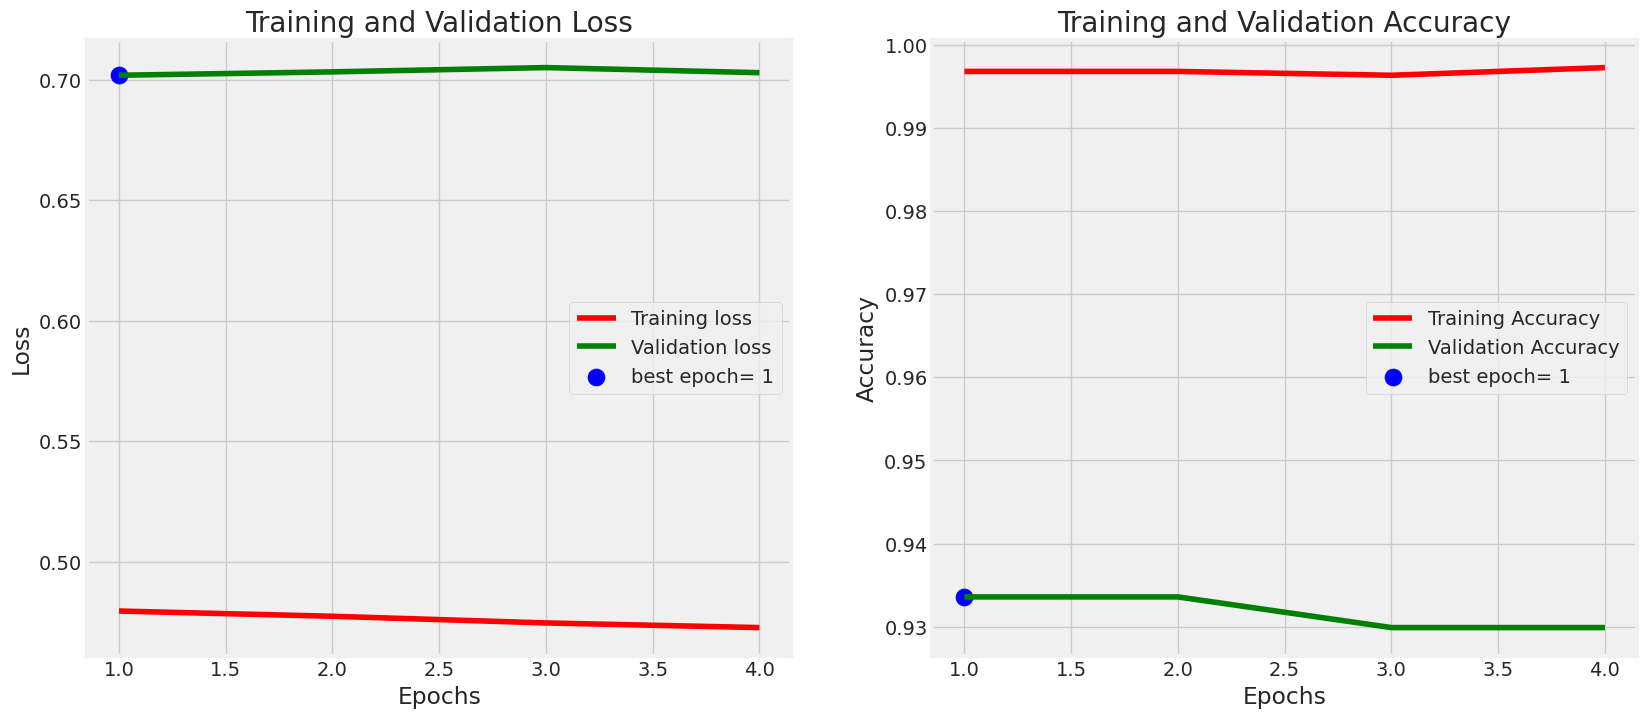

In [ ]:
plot_training(history)

This code below computes the batch size and number of steps needed for evaluating a machine learning model on three sets of data: training, validation, and test data. It then evaluates the model on each set of data and prints out the loss and accuracy scores for each set.

The batch size for the evaluation is determined by finding the largest factor of the length of the test data that is less than or equal to 80. The number of steps is then computed by dividing the length of the test data by the batch size. The model is evaluated on each set of data using the evaluate function with the corresponding generator and number of steps. The loss and accuracy scores for each set of data are printed out.


In [ ]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

 55/271 [=====>........................] - ETA: 1:10 - loss: 0.4292 - accuracy: 0.9972

  7/271 [..............................] - ETA: 56s - loss: 0.7019 - accuracy: 0.9336

271/271 [==============================] - 177s 653ms/step - loss: 0.8032 - accuracy: 0.8967
Train Loss:  0.42918869853019714
Train Accuracy:  0.9972311854362488
--------------------
Validation Loss:  0.7018529176712036
Validation Accuracy:  0.9335793256759644
--------------------
Test Loss:  0.8032280802726746
Test Accuracy:  0.8966789841651917


This code below uses a trained machine learning model to make predictions on the test data.

The predict_generator function is called on the model with the test data generator as an input. This generates predicted outputs for the test data. The preds variable stores the predicted outputs.

The argmax function from the numpy library is used to obtain the index of the maximum value in each predicted output. This is used to obtain the predicted class for each input in the test data. The y_pred variable stores the predicted class labels for the test data.

Finally, the predicted class labels are printed out using the print function. This allows us to analyze the performance of the model and compare it to the true labels for the test data.

In [ ]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)
print(y_pred)

[22 14 29 30 34 30  1 19 42 35 15 31 29 28 32  8 32 31  6 28 30 32 34 32
 27 43 26 40 23 40 13 17  0 34 43 42 25 37 18 43 25 34  2 29 31 35 43 16
 40 40 38 27  6 33 32 34 27 26 16 43  5 13 13 24  9 22 32 33 32 24 42  0
 11 34  7 42 30  5 36 25  1 37 40 26 23 42 26  5 38 37 37 36 10 26 34 23
  0  1 13 37 24  0  4  8 41 19 24 40 25 29 22  0 43  1 15  4 15 28 29 16
 35  2 28  3 23 27 43 37 16 12  8 35  4 41  1 41 17 25 39 36 25 25 22 42
  4 35 36 36 22 25 27 35 33 27 33 12  5  5 39  2 29 37  0  1 33 34  3 42
  2 24  8 16 42 40  3 21 16 24  3 41 27 30  5  8 33  4 17 16 37 34 28 29
 14 18 42  6 34 28  0 29  5 16  5  6 30  1  1  8 21 12  3 11 26  7 40 36
  1 30 37 31 22  7 22  3  4 29 41 34  2 15  2 16 31 40 32  7 35 13  2 30
 24 26  0  3 32  1 36  4 39  4 29 26 22  9  1 17 31 36 29 29 18 43 31 32
 35 28 27 35 42 15  7]


This code below generates a classification report that summarizes the performance of a machine learning model on the test data.

The first line of code g_dict = test_gen.class_indices creates a dictionary that maps the class labels to their corresponding indices. This is obtained from the class_indices attribute of the test data generator.

The next line of code classes = list(g_dict.keys()) creates a list of the class labels by extracting the keys of the g_dict dictionary.

The classification_report function from the sklearn library is then called with the true labels for the test data (test_gen.classes), the predicted labels (y_pred), and the list of class labels (classes). This function computes and prints a classification report that includes metrics such as precision, recall, and F1-score for each class, as well as the average values across all classes.



In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

                        precision    recall  f1-score   support

        Astrocitoma T1       1.00      1.00      1.00         8
      Astrocitoma T1C+       0.91      1.00      0.95        10
        Astrocitoma T2       0.86      0.75      0.80         8
          Carcinoma T1       0.86      0.86      0.86         7
        Carcinoma T1C+       0.88      0.88      0.88         8
          Carcinoma T2       1.00      1.00      1.00         8
         Ependimoma T1       1.00      1.00      1.00         4
       Ependimoma T1C+       1.00      1.00      1.00         5
         Ependimoma T2       0.83      1.00      0.91         5
      Ganglioglioma T1       1.00      1.00      1.00         2
    Ganglioglioma T1C+       1.00      0.50      0.67         2
      Ganglioglioma T2       1.00      1.00      1.00         2
          Germinoma T1       1.00      1.00      1.00         3
        Germinoma T1C+       0.80      1.00      0.89         4
          Germinoma T2       0.50      